# Analytical Ramsey Scheme for a single TLS

Here, we derive the exact analytical expression for Ramsey fringes.

## General solution of the TLS dynamics

In [1]:
from sympy import Function, symbols, sqrt, Eq, Abs, exp, cos, sin, Matrix, dsolve, solve, S, lambdify
from sympy import I as 𝕚, pi as π

In [2]:
g = Function('g')
e = Function('e')
t, τ = symbols('t, tau', positive=True)
Δ = symbols('Delta', real=True)
η = symbols('eta', positive=True)
Ω = symbols('Omega', real=True)
g0, e0 = symbols('g_0, e_0')

In [3]:
Ĥ = Matrix([
    [-Δ/2,  η ],
    [  η,  Δ/2]
])
Ĥ

Matrix([
[-Delta/2,     eta],
[     eta, Delta/2]])

In [4]:
TDSE_system = [
    g(t).diff(t) + 𝕚 * (Ĥ[0,0] * g(t) + Ĥ[0,1] * e(t)),
    e(t).diff(t) + 𝕚 * (Ĥ[1,0]*  g(t) + Ĥ[1,1] * e(t)),
]

In [5]:
sols_gen = dsolve(TDSE_system, [g(t), e(t)])

In [6]:
effective_rabi_freq = {
    Ω: sqrt(Δ**2 + (2*η)**2)
}

In [7]:
Eq(Ω, effective_rabi_freq[Ω])

Eq(Omega, sqrt(Delta**2 + 4*eta**2))

In [8]:
find_Ω = {
    sqrt(-Δ**2 - 4 * η**2): 𝕚 * Ω,
    sqrt(Δ**2 + 4 * η**2): Ω
}

In [9]:
sols_gen[0].subs(find_Ω)

Eq(g(t), -C1*(Delta + Omega)*exp(I*Omega*t/2)/(2*eta) - C2*(Delta - Omega)*exp(-I*Omega*t/2)/(2*eta))

In [10]:
sols_gen[1].subs(find_Ω)

Eq(e(t), C1*exp(I*Omega*t/2) + C2*exp(-I*Omega*t/2))

## Analytical solution for initial-value Rabi cycling

We specialize the above general solution to an arbitrary initial state with complex amplidues $g_0$, $e_0$.

In [11]:
boundary_conditions = {
    t: 0,
    g(t): g0,
    e(t) : e0,
}

In [12]:
find_4ηsq = {
    Ω**2 - Δ**2: 4 * η**2
}

In [13]:
C1, C2 = symbols("C1, C2")

In [14]:
_integration_constants = solve(
    [sol.subs(find_Ω).subs(boundary_conditions) for sol in sols_gen],
    [C1, C2]
)
integration_constants = {
    k: v.subs(find_4ηsq)
    for (k, v) in _integration_constants.items()
}

In [15]:
Eq(C1, integration_constants[C1])

Eq(C1, (-Delta*e_0 + Omega*e_0 - 2*eta*g_0)/(2*Omega))

In [16]:
Eq(C2, integration_constants[C2])

Eq(C2, (Delta*e_0 + Omega*e_0 + 2*eta*g_0)/(2*Omega))

In [17]:
def simplify_sol_g(sol_g):
    rhs = (
        sol_g
        .rhs
        .rewrite(sin)
        .expand()
        .collect(𝕚)
        .subs(effective_rabi_freq)
        .simplify()
        .subs(find_Ω)
    )
    return Eq(sol_g.lhs, rhs)

In [18]:
sol_g = simplify_sol_g(sols_gen[0].subs(find_Ω).subs(integration_constants))
sol_g

Eq(g(t), (I*Delta*g_0*sin(Omega*t/2) + Omega*g_0*cos(Omega*t/2) - 2*I*e_0*eta*sin(Omega*t/2))/Omega)

In [19]:
sol_e = (
    sols_gen[1]
    .subs(find_Ω)
    .subs(integration_constants)
    .expand()
    .rewrite(sin)
    .expand()
)
sol_e

Eq(e(t), -I*Delta*e_0*sin(Omega*t/2)/Omega + e_0*cos(Omega*t/2) - 2*I*eta*g_0*sin(Omega*t/2)/Omega)

For example, when starting from the ground state:

In [20]:
sol_g.subs({g0: 1, e0: 0})

Eq(g(t), (I*Delta*sin(Omega*t/2) + Omega*cos(Omega*t/2))/Omega)

In [21]:
sol_e.subs({g0: 1, e0: 0})

Eq(e(t), -2*I*eta*sin(Omega*t/2)/Omega)

For the population dynamics, we find:

In [22]:
def abs_sq(eq):
    lhs = eq.lhs
    rhs = eq.rhs
    return Eq(Abs(lhs)**2, (rhs * rhs.conjugate()).expand())

In [23]:
abs_sq(sol_g.subs({g0: 1, e0: 0}))

Eq(Abs(g(t))**2, Delta**2*sin(Omega*t/2)**2/Omega**2 + cos(Omega*t/2)**2)

In [24]:
abs_sq(sol_e.subs({g0: 1, e0: 0}))

Eq(Abs(e(t))**2, 4*eta**2*sin(Omega*t/2)**2/Omega**2)

## Initial π/2 pulse

In [25]:
T = π / (4*η)

For the ground state amplitude, we find:

In [26]:
sol_g_πhalf = sol_g.subs({g0: 1, e0: 0}).subs({t:T})
sol_g_πhalf

Eq(g(pi/(4*eta)), (I*Delta*sin(pi*Omega/(8*eta)) + Omega*cos(pi*Omega/(8*eta)))/Omega)

In [27]:
sol_g_πhalf.subs({g0: 1, e0: 0}).subs(effective_rabi_freq).subs({Δ: 0, η: 15})

Eq(g(pi/60), sqrt(2)/2)

In [28]:
sol_g_πhalf.subs({g0: 1, e0: 0}).subs(effective_rabi_freq).subs({Δ: 0, η: 15}).evalf()

Eq(g(pi/60), 0.707106781186548)

In [29]:
sol_g_πhalf.subs({g0: 1, e0: 0}).subs(effective_rabi_freq).subs({Δ: S(1)/5, η: 15}).evalf()

Eq(g(pi/60), 0.70709443987448 + 0.00471402272699148*I)

For the excited state amplitude, we find:

In [30]:
sol_e_πhalf = sol_e.subs({g0: 1, e0: 0}).subs({t:T})
sol_e_πhalf

Eq(e(pi/(4*eta)), -2*I*eta*sin(pi*Omega/(8*eta))/Omega)

In [31]:
sol_e_πhalf.subs({g0: 1, e0: 0}).subs(effective_rabi_freq).subs({Δ: 0, η: 15})

Eq(e(pi/60), -sqrt(2)*I/2)

In [32]:
sol_e_πhalf.subs({g0: 1, e0: 0}).subs(effective_rabi_freq).subs({Δ: 0, η: 15}).evalf()

Eq(e(pi/60), -0.707106781186548*I)

In [33]:
sol_e_πhalf.subs({g0: 1, e0: 0}).subs(effective_rabi_freq).subs({Δ: S(1)/5, η: 15}).evalf()

Eq(e(pi/60), -0.707103409048722*I)

## Free time evolution

In [34]:
timeshift_free = {g(τ): g(τ + T), e(τ): e(τ + T)}

In [35]:
sol_g_free = (
    sol_g
    .expand()
    .subs(effective_rabi_freq)
    .subs({η: 0})
    .subs({Δ: symbols("Delta", positive=True)})
    .subs({t:τ})
    .rewrite(exp)
    .expand()
    .subs({symbols("Delta", positive=True): Δ})
    .subs(timeshift_free)
)
sol_g_free

Eq(g(tau + pi/(4*eta)), g_0*exp(I*Delta*tau/2))

In [36]:
sol_e_free = (
    sol_e
    .expand()
    .subs(effective_rabi_freq)
    .subs({η: 0})
    .subs({Δ: symbols("Delta", positive=True)})
    .subs({t:τ})
    .rewrite(exp)
    .expand()
    .subs({symbols("Delta", positive=True): Δ})
    .subs(timeshift_free)
)
sol_e_free

Eq(e(tau + pi/(4*eta)), e_0*exp(-I*Delta*tau/2))

In [37]:
Ψ_πhalf_ideal = {g0: sqrt(2)/2, e0: -𝕚*sqrt(2)/2}

In [38]:
sol_g_free_ideal = sol_g_free.subs(Ψ_πhalf_ideal)
sol_g_free_ideal

Eq(g(tau + pi/(4*eta)), sqrt(2)*exp(I*Delta*tau/2)/2)

In [39]:
abs_sq(sol_g_free_ideal)

Eq(Abs(g(tau + pi/(4*eta)))**2, 1/2)

In [40]:
sol_e_free_ideal = sol_e_free.subs(Ψ_πhalf_ideal)
sol_e_free_ideal

Eq(e(tau + pi/(4*eta)), -sqrt(2)*I*exp(-I*Delta*tau/2)/2)

In [41]:
abs_sq(sol_e_free_ideal)

Eq(Abs(e(tau + pi/(4*eta)))**2, 1/2)

In [42]:
Ψ_πhalf_actual = {g0: sol_g_πhalf.rhs, e0: sol_e_πhalf.rhs}

In [43]:
sol_g_free_actual = sol_g_free.subs(Ψ_πhalf_actual).expand()
sol_g_free_actual

Eq(g(tau + pi/(4*eta)), I*Delta*exp(I*Delta*tau/2)*sin(pi*Omega/(8*eta))/Omega + exp(I*Delta*tau/2)*cos(pi*Omega/(8*eta)))

In [44]:
sol_e_free_actual = sol_e_free.subs(Ψ_πhalf_actual).expand()
sol_e_free_actual

Eq(e(tau + pi/(4*eta)), -2*I*eta*exp(-I*Delta*tau/2)*sin(pi*Omega/(8*eta))/Omega)

## Final π/2 pulse

In [45]:
Ψ_free_actual = {g0: sol_g_free_actual.rhs, e0: sol_e_free_actual.rhs}

In [46]:
timeshift_final = {g(T): g(2*T + τ), e(T): e(2*T + τ)}

In [47]:
sol_g_final = sol_g.subs(Ψ_free_actual).subs({t:T}).expand().subs(timeshift_final)
sol_g_final

Eq(g(tau + pi/(2*eta)), -Delta**2*exp(I*Delta*tau/2)*sin(pi*Omega/(8*eta))**2/Omega**2 + 2*I*Delta*exp(I*Delta*tau/2)*sin(pi*Omega/(8*eta))*cos(pi*Omega/(8*eta))/Omega + exp(I*Delta*tau/2)*cos(pi*Omega/(8*eta))**2 - 4*eta**2*exp(-I*Delta*tau/2)*sin(pi*Omega/(8*eta))**2/Omega**2)

In [48]:
pop_g_final = abs_sq(sol_g_final)
pop_g_final

Eq(Abs(g(tau + pi/(2*eta)))**2, Delta**4*sin(pi*Omega/(8*eta))**4/Omega**4 + 2*Delta**2*sin(pi*Omega/(8*eta))**2*cos(pi*Omega/(8*eta))**2/Omega**2 + 4*Delta**2*eta**2*exp(I*Delta*tau)*sin(pi*Omega/(8*eta))**4/Omega**4 + 4*Delta**2*eta**2*exp(-I*Delta*tau)*sin(pi*Omega/(8*eta))**4/Omega**4 - 8*I*Delta*eta**2*exp(I*Delta*tau)*sin(pi*Omega/(8*eta))**3*cos(pi*Omega/(8*eta))/Omega**3 + 8*I*Delta*eta**2*exp(-I*Delta*tau)*sin(pi*Omega/(8*eta))**3*cos(pi*Omega/(8*eta))/Omega**3 + cos(pi*Omega/(8*eta))**4 - 4*eta**2*exp(I*Delta*tau)*sin(pi*Omega/(8*eta))**2*cos(pi*Omega/(8*eta))**2/Omega**2 - 4*eta**2*exp(-I*Delta*tau)*sin(pi*Omega/(8*eta))**2*cos(pi*Omega/(8*eta))**2/Omega**2 + 16*eta**4*sin(pi*Omega/(8*eta))**4/Omega**4)

In [49]:
sol_e_final = sol_e.subs(Ψ_free_actual).subs({t:T}).expand().subs(timeshift_final)
sol_e_final

Eq(e(tau + pi/(2*eta)), 2*Delta*eta*exp(I*Delta*tau/2)*sin(pi*Omega/(8*eta))**2/Omega**2 - 2*Delta*eta*exp(-I*Delta*tau/2)*sin(pi*Omega/(8*eta))**2/Omega**2 - 2*I*eta*exp(I*Delta*tau/2)*sin(pi*Omega/(8*eta))*cos(pi*Omega/(8*eta))/Omega - 2*I*eta*exp(-I*Delta*tau/2)*sin(pi*Omega/(8*eta))*cos(pi*Omega/(8*eta))/Omega)

In [50]:
pop_e_final = abs_sq(sol_e_final)
pop_e_final

Eq(Abs(e(tau + pi/(2*eta)))**2, -4*Delta**2*eta**2*exp(I*Delta*tau)*sin(pi*Omega/(8*eta))**4/Omega**4 + 8*Delta**2*eta**2*sin(pi*Omega/(8*eta))**4/Omega**4 - 4*Delta**2*eta**2*exp(-I*Delta*tau)*sin(pi*Omega/(8*eta))**4/Omega**4 + 8*I*Delta*eta**2*exp(I*Delta*tau)*sin(pi*Omega/(8*eta))**3*cos(pi*Omega/(8*eta))/Omega**3 - 8*I*Delta*eta**2*exp(-I*Delta*tau)*sin(pi*Omega/(8*eta))**3*cos(pi*Omega/(8*eta))/Omega**3 + 4*eta**2*exp(I*Delta*tau)*sin(pi*Omega/(8*eta))**2*cos(pi*Omega/(8*eta))**2/Omega**2 + 8*eta**2*sin(pi*Omega/(8*eta))**2*cos(pi*Omega/(8*eta))**2/Omega**2 + 4*eta**2*exp(-I*Delta*tau)*sin(pi*Omega/(8*eta))**2*cos(pi*Omega/(8*eta))**2/Omega**2)

We can find an "ideal" expression in the limit $\eta \gg \Delta$. That is, $\Omega \approx 2\eta$ and $\Delta/\eta \rightarrow 0$:

In [51]:
pop_g_final_ideal = Eq(
    symbols('p_g'),
    pop_g_final
    .subs({Ω: 2*η})
    .rewrite(sin)
    .expand()
    .subs({Δ/η: 0})
    .rhs
)
pop_g_final_ideal

Eq(p_g, 1/2 - cos(Delta*tau)/2)

In [52]:
pop_e_final_ideal = Eq(
    symbols('p_e'),
    pop_e_final
    .subs({Ω: 2*η})
    .rewrite(sin)
    .expand()
    .subs({Δ/η: 0})
    .rhs
)
pop_e_final_ideal

Eq(p_e, cos(Delta*tau)/2 + 1/2)

Note that his is simply $\cos(\Delta\cdot\tau/2)^2$:

In [53]:
assert (pop_e_final_ideal.rhs - cos(Δ*τ/2)**2).simplify() == S(0)

## Ramsey Fringes

The "Ramsey fringes" result from plotting the excitated state popultion for varying detunging $\Delta$ and fixed pulse amplitude $\eta$ and time-of-flight $\tau$.

In [54]:
from matplotlib import pylab as plt
import numpy as np

In [55]:
pop_e_func = lambdify([Δ, η, τ], pop_e_final.subs(effective_rabi_freq).rhs)

In [56]:
pop_e_ideal_func = lambdify([Δ, η, τ], pop_e_final_ideal.subs(effective_rabi_freq).rhs)

In [57]:
def plot_ramsey_fringes(
    Δ_min=-1,
    Δ_max=1,
    η=1,
    τ=10.0,
    N=101,
    ax=None,
    label=None,
    figsize=(10, 6),
    func=pop_e_func,
    legend=None,
):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    Δ_vals = np.linspace(Δ_min, Δ_max, N)
    p_vals = func(Δ_vals, eta=η, tau=τ).real
    ax.plot(Δ_vals, p_vals, label=label)
    ax.set_xlabel("Δ")
    ax.set_ylabel("pₑ")
    if legend is None:
        legend = label is not None
    if legend:
        ax.legend()
    return ax

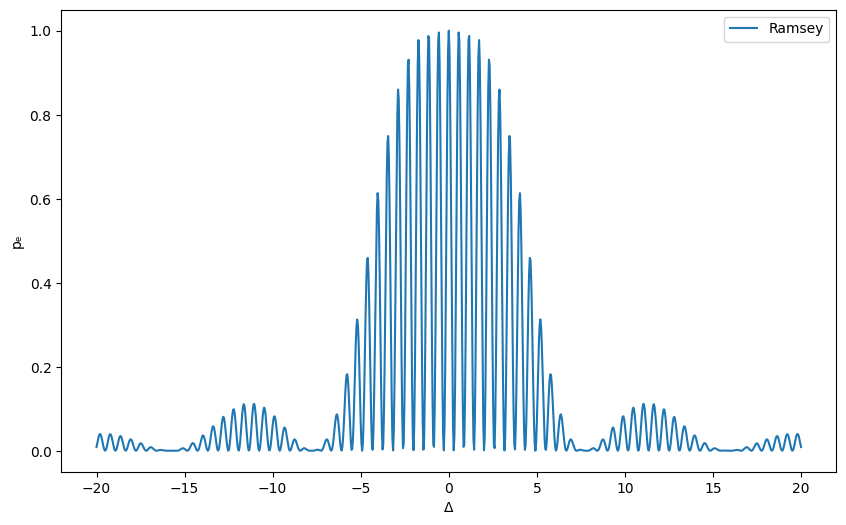

In [58]:
ax = plot_ramsey_fringes(Δ_min=-20, Δ_max=20, N=1001, label="Ramsey")
#plot_ramsey_fringes(Δ_min=-20, Δ_max=20, N=1001, label="ideal", ax=ax, func=pop_e_ideal_func)

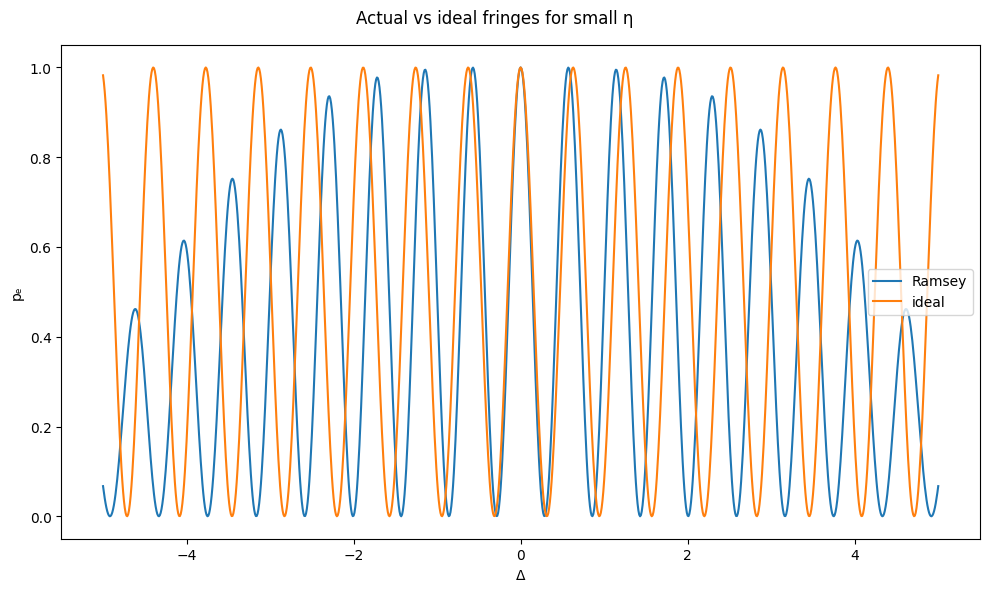

In [59]:
ax = plot_ramsey_fringes(Δ_min=-5, Δ_max=5, N=1001, η=1, label="Ramsey");
ax = plot_ramsey_fringes(Δ_min=-5, Δ_max=5, N=1001, η=1, label="ideal", ax=ax, func=pop_e_ideal_func);
ax.figure.suptitle("Actual vs ideal fringes for small η");
ax.figure.tight_layout()

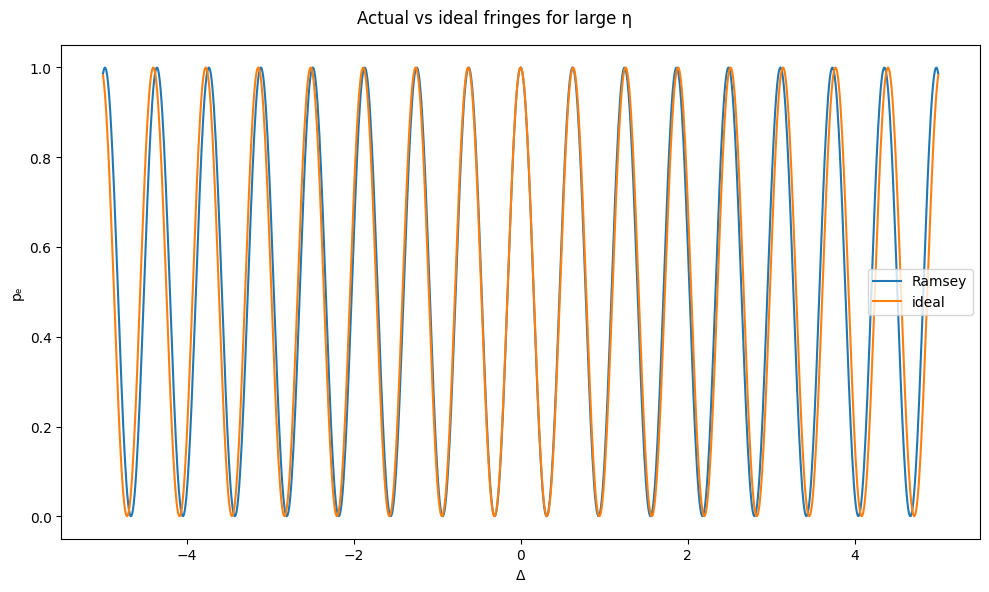

In [60]:
ax = plot_ramsey_fringes(Δ_min=-5, Δ_max=5, N=1001, η=10, label="Ramsey");
ax = plot_ramsey_fringes(Δ_min=-5, Δ_max=5, N=1001, η=10, label="ideal", ax=ax, func=pop_e_ideal_func);
ax.figure.suptitle("Actual vs ideal fringes for large η");
ax.figure.tight_layout()

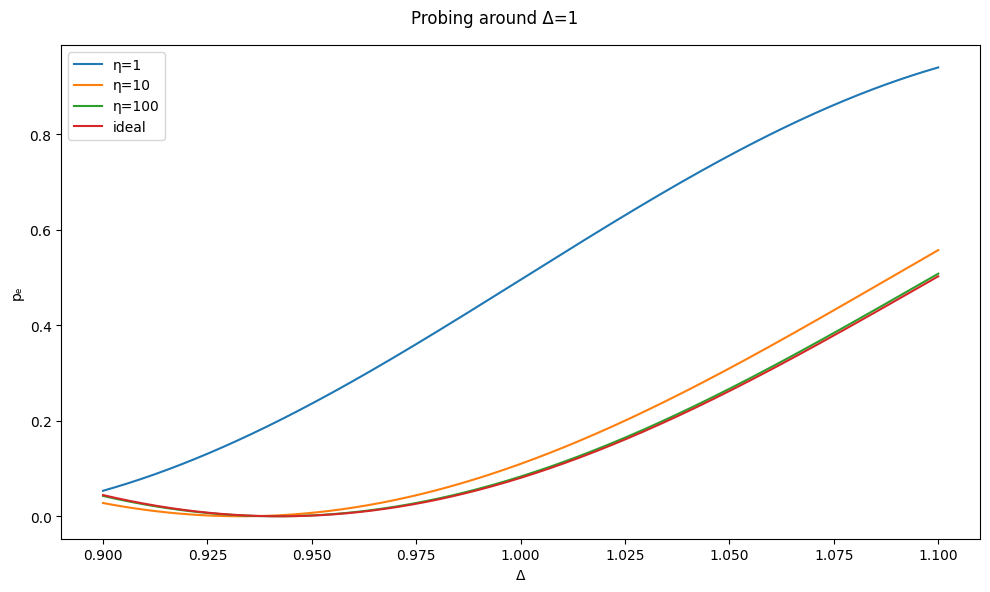

In [61]:
ax = plot_ramsey_fringes(Δ_min=0.9, Δ_max=1.1, N=1001, η=1, label="η=1")
plot_ramsey_fringes(Δ_min=0.9, Δ_max=1.1, N=1001, η=10, label="η=10", ax=ax)
plot_ramsey_fringes(Δ_min=0.9, Δ_max=1.1, N=1001, η=100, label="η=100", ax=ax)
plot_ramsey_fringes(Δ_min=0.9, Δ_max=1.1, N=1001, label="ideal", ax=ax, func=pop_e_ideal_func);
ax.figure.suptitle("Probing around Δ=1");
ax.figure.tight_layout()

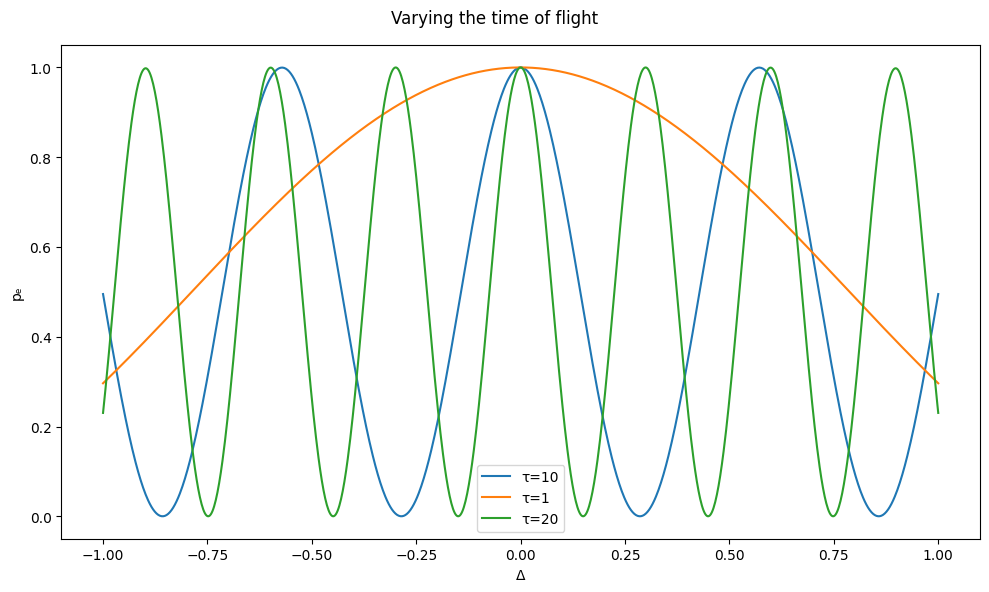

In [62]:
ax = plot_ramsey_fringes(Δ_min=-1, Δ_max=1, N=1001, τ=10, label="τ=10");
plot_ramsey_fringes(Δ_min=-1, Δ_max=1, N=1001, τ=1, label="τ=1", ax=ax);
plot_ramsey_fringes(Δ_min=-1, Δ_max=1, N=1001, τ=20, label="τ=20", ax=ax);
ax.figure.suptitle("Varying the time of flight");
ax.figure.tight_layout()

Conclusions:

* The more $η > Δ$, that is, the faster/stronger the Rabi pulses, the better the fringes are described by the "ideal" expression $\cos(\Delta\cdot\tau/2)^2$
* The width of the fringes is determined by the time of flight $\tau$